#Linear Regression Implementation

##Overview:
Linear regression is a supervised machine learning algorithm used for predicting a continuous target variable based on one or more independent features. It assumes a linear relationship between the features and the target variable.

##Working of Linear Regression:
The algorithm aims to find the best-fitting line (or hyperplane in higher dimensions) through the data that minimizes the sum of the squared differences between the predicted and actual values. This line is characterized by coefficients (weights) assigned to each feature and an intercept term (bias).

##Dataset:
The dataset used in this implementation contains information about salaries and years of experience. The goal is to predict salaries based on the number of years of experience.

##Implementation Details:
- The code uses a custom LinearRegression class that implements linear regression using gradient descent.
- The dataset is split into training and testing sets using the train_test_split function from scikit-learn.
- Features are standardized using StandardScaler to ensure consistent scaling.
- A bias term (intercept) is added to the feature matrices.
- The model is trained on the training set using gradient descent.
- Model evaluation is performed on the test set, and predictions are visualized using scatter plots.


In [60]:
# Import relevant packages
import numpy as np  # NumPy for numerical operations
import matplotlib.pyplot as plt  # Matplotlib for plotting
import seaborn as sns  # Seaborn for statistical data visualization
import pandas as pd  # Pandas for data manipulation and analysis
from sklearn.model_selection import train_test_split  # scikit-learn for machine learning, train-test split
from sklearn.preprocessing import StandardScaler  # scikit-learn for preprocessing, standardization

In [61]:
# Get dataset
# Read the CSV file containing salary data into a Pandas DataFrame
df_sal = pd.read_csv('/content/drive/MyDrive/Salary_Data.csv')

# Display the first few rows of the DataFrame to inspect the data
df_sal.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [62]:
# Describe data
df_sal.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<ipython-input-63-2d754b325291>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_sal['Salary'])


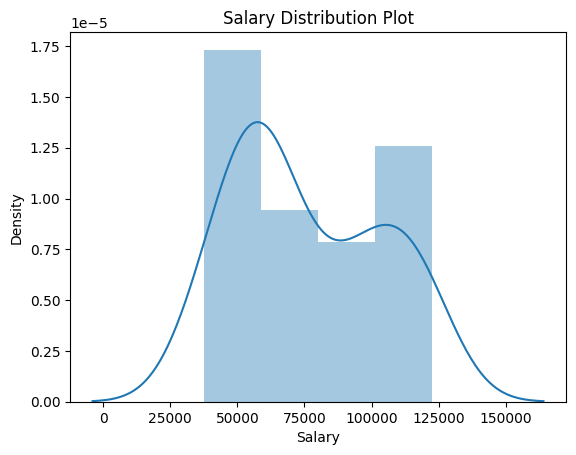

In [63]:
# Data distribution
plt.title('Salary Distribution Plot')
sns.distplot(df_sal['Salary'])
plt.show()

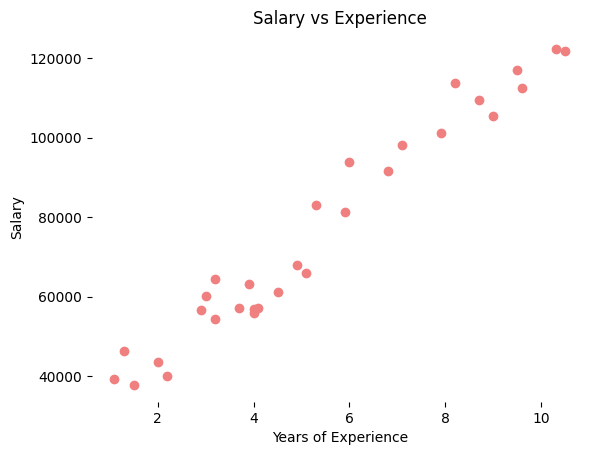

In [64]:
# Relationship between Salary and Experience
plt.scatter(df_sal['YearsExperience'], df_sal['Salary'], color = 'lightcoral')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.box(False)
plt.show()

In [65]:
class LinearRegression:
    """
    A class implementing linear regression using gradient descent.

    Parameters
    ----------
    None

    Attributes
    ----------
    weight : numpy.ndarray
        Weight vector for the linear regression model.
    loss : list
        List storing mean squared error values at each epoch during training.

    Methods
    -------
    fit(X, y, learning_rate=0.01, epochs=1000)
        Fits the linear regression model to the training data.
    predict(X)
        Predicts the target variable for the test data.
    """
    def __init__(self):
        """
        Initializes the LinearRegression object.
        """
        self.weight = None
        self.loss = []

    def fit(self, X, y, learning_rate=0.01, epochs=1000):
        """
        Fits the linear regression model to the training data using gradient descent.

        Parameters
        ----------
        X : numpy.ndarray
            Feature matrix of shape (m, n).
        y : numpy.ndarray
            Target variable vector of shape (m, 1).
        learning_rate : float
            Learning rate for gradient descent. Default is 0.01.
        epochs : int
            Number of epochs for gradient descent. Default is 1000.
        """
        m, n = X.shape
        self.weight = np.zeros((n, 1))

        for i in range(epochs):
            h = np.dot(X, self.weight)
            error = h - y
            gradient = np.dot(X.T, error) / m
            self.weight -= learning_rate * gradient
            mse = np.mean(error ** 2)
            self.loss.append(mse)

    def predict(self, X):
        """
        Predicts the target variable for the test data.

        Parameters
        ----------
        X : numpy.ndarray
            Feature matrix of shape (m, n).

        Returns
        -------
        numpy.ndarray
            Predicted target variable vector of shape (m, 1).
        """
        return np.dot(X, self.weight)

In [66]:
# Splitting variables
# Extracting independent variable(s) (features) from the DataFrame
X = df_sal.iloc[:, :1]

# Extracting dependent variable (target) from the DataFrame
y = df_sal.iloc[:, 1:]

In [67]:
# Splitting dataset into test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [68]:
# Standardize the features using StandardScaler
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
sc_X = StandardScaler()

# Fit and transform the training data
X_train = sc_X.fit_transform(X_train)

# Transform the test data using the same scaler
X_test = sc_X.transform(X_test)

In [69]:
# Add bias term
X_train = np.insert(X_train, 0, 1, axis=1)
X_test = np.insert(X_test, 0, 1, axis=1)

In [70]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train, learning_rate = 0.01, epochs = 500)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/

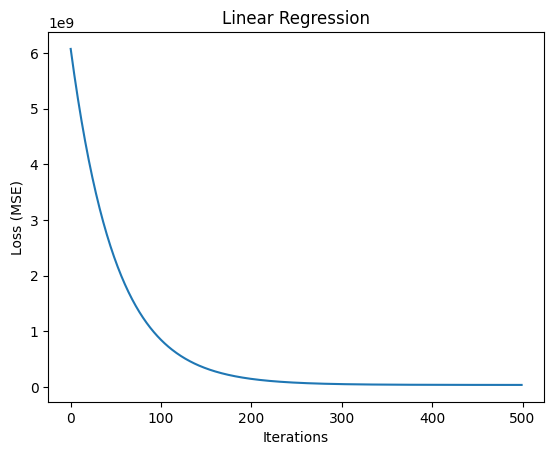

In [71]:
# Plot training loss
plt.plot(model.loss)
plt.xlabel('Iterations')
plt.ylabel('Loss (MSE)')
plt.title('Linear Regression')
plt.show()

In [77]:
# Evaluate model on train data
y_pred = model.predict(X_train)

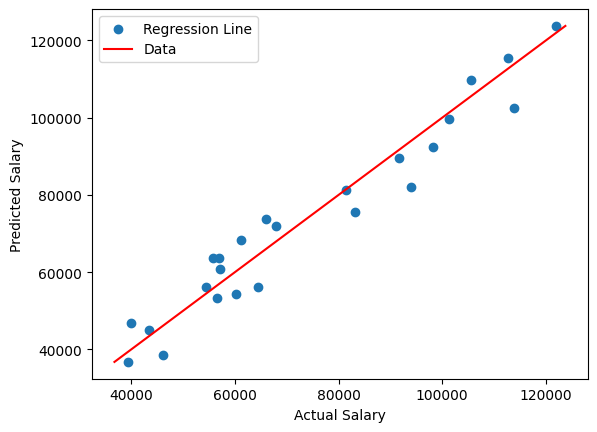

In [78]:
# Plot actual vs predicted
plt.scatter(y_train, y_pred)

# Find the range for creating the red regression line
data_range = np.linspace(min(min(y_train.values), min(y_pred)), max(max(y_train.values), max(y_pred)), num=100)

# Creating a red regression line on the plot
plt.plot(data_range, data_range, color='red')

# Adding labels and legend to the plot
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.legend(['Regression Line', 'Data'])

# Displaying the plot
plt.show()

In [79]:
# Evaluate model on test data
y_pred = model.predict(X_test)

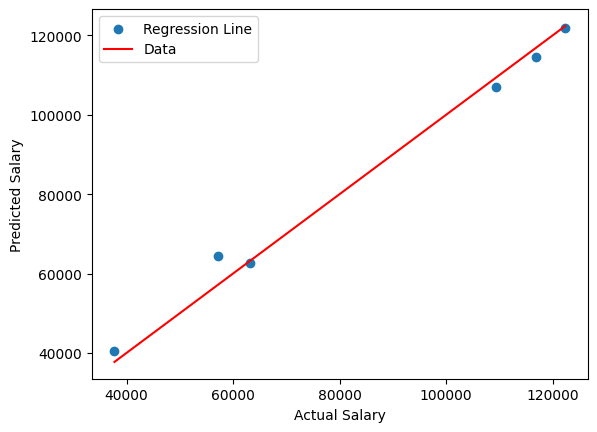

In [80]:
# Convert y_test and y_pred to numeric type
y_test_numeric = y_test.astype(float)
y_pred_numeric = y_pred.astype(float)

# Plot actual vs predicted
plt.scatter(y_test_numeric, y_pred_numeric)

# Find the range for creating the red regression line
data_range = np.linspace(min(min(y_test_numeric.values), min(y_pred_numeric)), max(max(y_test_numeric.values), max(y_pred_numeric)), num=100)

# Creating a red regression line on the plot
plt.plot(data_range, data_range, color='red')

# Adding labels and legend to the plot
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.legend(['Regression Line', 'Data'])

# Displaying the plot
plt.show()

#Conclusion:
In this implementation, we explored the application of linear regression to predict salaries based on years of experience. The process involved preparing the dataset, splitting it into training and testing sets, standardizing features, and training the model using gradient descent. The model's performance was evaluated on the test set, and the predictions were visualized using scatter plots.

Key Findings:
1. The scatter plots with regression lines provide a visual assessment of the model's predictive performance.
2. Mean Squared Error (MSE) or other regression metrics can be used for a quantitative evaluation of the model's accuracy on the test set.
3. Standardizing features and adding a bias term are essential preprocessing steps for linear regression.
4. The linear regression model can be used to make predictions on new data, allowing for salary estimation based on years of experience.

